c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

MAE (Mean Absolute Error): 134.80
RMSE (Root Mean Squared Error): 243.17


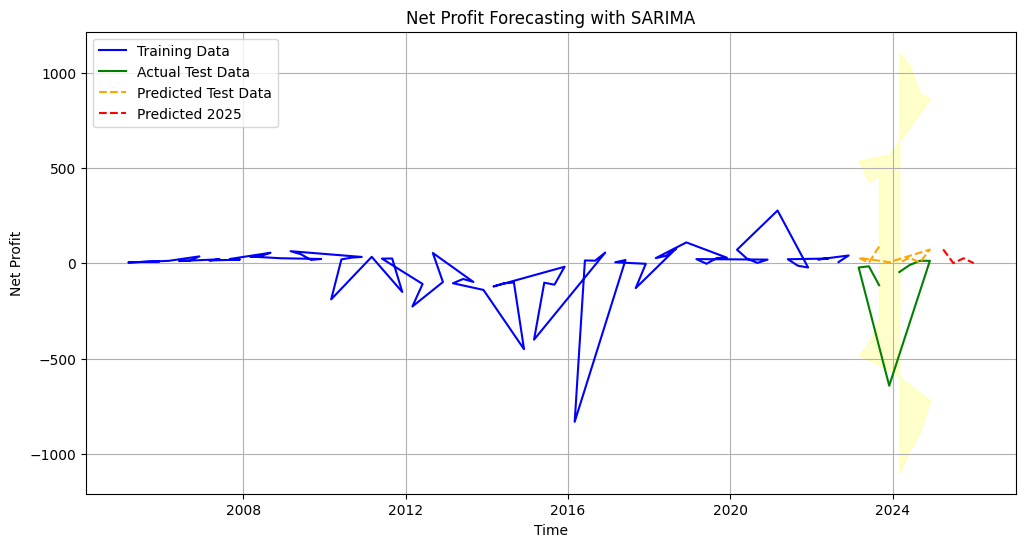


Predicted Net Profits for 2025:
Mar 25: 73.49
Jun 25: 1.52
Sep 25: 26.81
Dec 25: 1.33


In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Step 1: Prepare the dataset
data = {
    'Quarter': [
        'Dec 05', 'Sep 05', 'Jun 05', 'Mar 05', 'Mar 06', 'Dec 06', 'Sep 06', 'Jun 06',
        'Jun 07', 'Mar 07', 'Dec 07', 'Sep 07', 'Sep 08', 'Jun 08', 'Mar 08', 'Dec 08',
        'Dec 09', 'Sep 09', 'Jun 09', 'Mar 09', 'Dec 10', 'Sep 10', 'Jun 10', 'Mar 10',
        'Mar 11', 'Dec 11', 'Sep 11', 'Jun 11', 'Jun 12', 'Mar 12', 'Dec 12', 'Sep 12',
        'Sep 13', 'Jun 13', 'Mar 13', 'Dec 13', 'Dec 14', 'Sep 14', 'Jun 14', 'Mar 14',
        'Dec 15', 'Sep 15', 'Jun 15', 'Mar 15', 'Dec 16', 'Sep 16', 'Jun 16', 'Mar 16',
        'Jun 17', 'Mar 17', 'Dec 17', 'Sep 17', 'Sep 18', 'Jun 18', 'Mar 18', 'Dec 18',
        'Dec 19', 'Sep 19', 'Jun 19', 'Mar 19', 'Dec 20', 'Sep 20', 'Jun 20', 'Mar 20',
        'Mar 21', 'Dec 21', 'Sep 21', 'Jun 21', 'Jun 22', 'Mar 22', 'Dec 22', 'Sep 22',
        'Sep 23', 'Jun 23', 'Mar 23', 'Dec 23', 'Dec 24', 'Sep 24', 'Jun 24', 'Mar 24'
    ],
    'Net Profit': [
        9.44, 9.33, 6.95, 4.68, 13.48, 36.78, 13.77, 12.22, 21.42, 15.4, 19.7, 23.21,
        55.78, 37.73, 36.13, 27.02, 23.14, 18.32, 48.04, 64.03, 33.85, 30.21, 20.89, -189.12,
        34.42, -150.21, 25.66, 25.06, -108.18, -226.69, -97.98, 54.75, -97.48, -81.94, -104.39,
        -139.44, -451.18, -100.4, -105.21, -121.33, -17.65, -111.91, -101.52, -400.96, 56.79,
        14.25, 15.51, -832.58, 17.7, 5.72, -2.1, -130.09, 78.61, 39.54, 27.75, 110.25, 30,
        28.16, -2.03, 22.5, 19.89, 2.58, 24.04, 71.76, 277.91, -21.77, -12.42, 21.75, 25.54,
        20.86, 41.5, 6.77, -114.78, -15.3, -21.56, -642.91, 13.64, 13.53, -9, -45.64
    ]
}

# Step 2: Convert data into a DataFrame
df = pd.DataFrame(data)
df['Quarter'] = pd.to_datetime(df['Quarter'], format='%b %y')
df.set_index('Quarter', inplace=True)

# Step 3: Split the data into training and testing sets
train_data = df.iloc[:-8]  # All but last 8 quarters
test_data = df.iloc[-8:]   # Last 8 quarters

# Step 4: Define and fit the SARIMA model
model = SARIMAX(train_data['Net Profit'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 4),
                enforce_stationarity=False, enforce_invertibility=False)
results = model.fit()

# Step 5: Forecast for the test period
test_forecast = results.get_forecast(steps=len(test_data))
test_predicted = test_forecast.predicted_mean
test_conf_int = test_forecast.conf_int()

# Step 6: Evaluate performance
mae = mean_absolute_error(test_data['Net Profit'], test_predicted)
rmse = np.sqrt(mean_squared_error(test_data['Net Profit'], test_predicted))
print(f"MAE (Mean Absolute Error): {mae:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")

# Step 7: Forecast for 2025
future_forecast = results.get_forecast(steps=len(test_data) + 4)
future_predicted = future_forecast.predicted_mean[-4:]
future_dates = pd.date_range(start='2025-03-31', periods=4, freq='Q')

# Step 8: Visualization
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data['Net Profit'], label='Training Data', color='blue')
plt.plot(test_data.index, test_data['Net Profit'], label='Actual Test Data', color='green')
plt.plot(test_data.index, test_predicted, label='Predicted Test Data', color='orange', linestyle='--')
plt.plot(future_dates, future_predicted, label='Predicted 2025', color='red', linestyle='--')
plt.fill_between(test_data.index, test_conf_int.iloc[:, 0], test_conf_int.iloc[:, 1], color='yellow', alpha=0.2)
plt.title('Net Profit Forecasting with SARIMA')
plt.xlabel('Time')
plt.ylabel('Net Profit')
plt.legend()
plt.grid(True)
plt.show()

# Step 9: Print 2025 predictions
print("\nPredicted Net Profits for 2025:")
for date, value in zip(future_dates, future_predicted):
    print(f"{date.strftime('%b %y')}: {value:.2f}")


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [27]:
df=pd.read_excel('3i_data.xlsx')
sales_data=df[['Quarterly','Net Profit']]
sales_data=pd.DataFrame(sales_data)
sales_data['Quarterly']=pd.to_datetime(sales_data['Quarterly'])
sales_data['Quarterly'] = pd.to_datetime(sales_data['Quarterly'], format='%Y-%m-%d')
print(sales_data.head())

   Quarterly  Net Profit
0 2005-12-31        2.09
1 2005-09-30        1.70
2 2005-06-30        1.34
3 2005-03-31        1.38
4 2006-03-31        1.44


In [28]:
df1 = sales_data.set_index('Quarterly')
df1_reset = df1.reset_index()
df1_reset.columns = ['Quarterly', 'Net Profit']
print(df1_reset)
sales_data['Quarterly'] = pd.to_datetime(sales_data['Quarterly'])  
df1 = sales_data.set_index('Quarterly')
numeric_cols = df1.select_dtypes(include=['number'])
quarterly_sales = numeric_cols.resample('QE').mean()
print(df1.head())
print(df1.info())  # Ensure "Quarterly" is recognized as DateTime

    Quarterly  Net Profit
0  2005-12-31        2.09
1  2005-09-30        1.70
2  2005-06-30        1.34
3  2005-03-31        1.38
4  2006-03-31        1.44
..        ...         ...
75 2023-12-31       93.98
76 2024-12-31       90.28
77 2024-09-30       91.35
78 2024-06-30       91.39
79 2024-03-31       95.38

[80 rows x 2 columns]
            Net Profit
Quarterly             
2005-12-31        2.09
2005-09-30        1.70
2005-06-30        1.34
2005-03-31        1.38
2006-03-31        1.44
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80 entries, 2005-12-31 to 2024-03-31
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Net Profit  80 non-null     float64
dtypes: float64(1)
memory usage: 1.2 KB
None


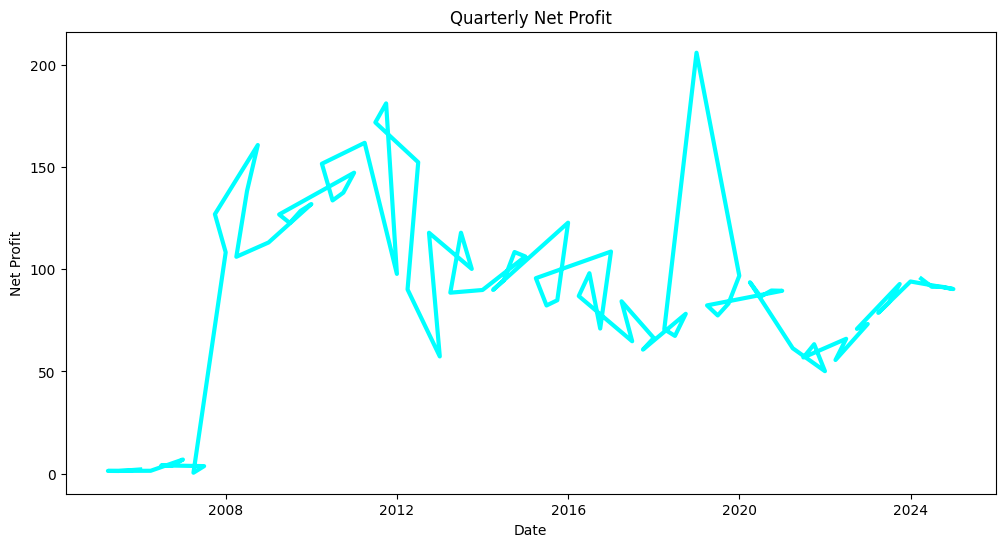

In [29]:
monthly_sales = sales_data.set_index('Quarterly')
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Net Profit'], linewidth=3, c='cyan')
plt.title("Quarterly Net Profit")
plt.xlabel("Date")
plt.ylabel("Net Profit")
plt.show()  

In [30]:
def check_stationarity(timeseries):
    # Perform the Dickey-Fuller test
    result = adfuller(timeseries, autolag='AIC')
    p_value = result[1]
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {p_value}')
    print('Stationary' if p_value < 0.05 else 'Non-Stationary')


check_stationarity(monthly_sales['Net Profit'])

ADF Statistic: -2.8906238717872514
p-value: 0.046449228020798816
Stationary


In [31]:
monthly_sales['Net Profit Diff'] = monthly_sales['Net Profit'].diff()

# Drop the first NaN value caused by differencing
monthly_sales = monthly_sales.dropna()

# Re-check stationarity
check_stationarity(monthly_sales['Net Profit Diff'])

ADF Statistic: -5.827755937121245
p-value: 4.0417261259431447e-07
Stationary


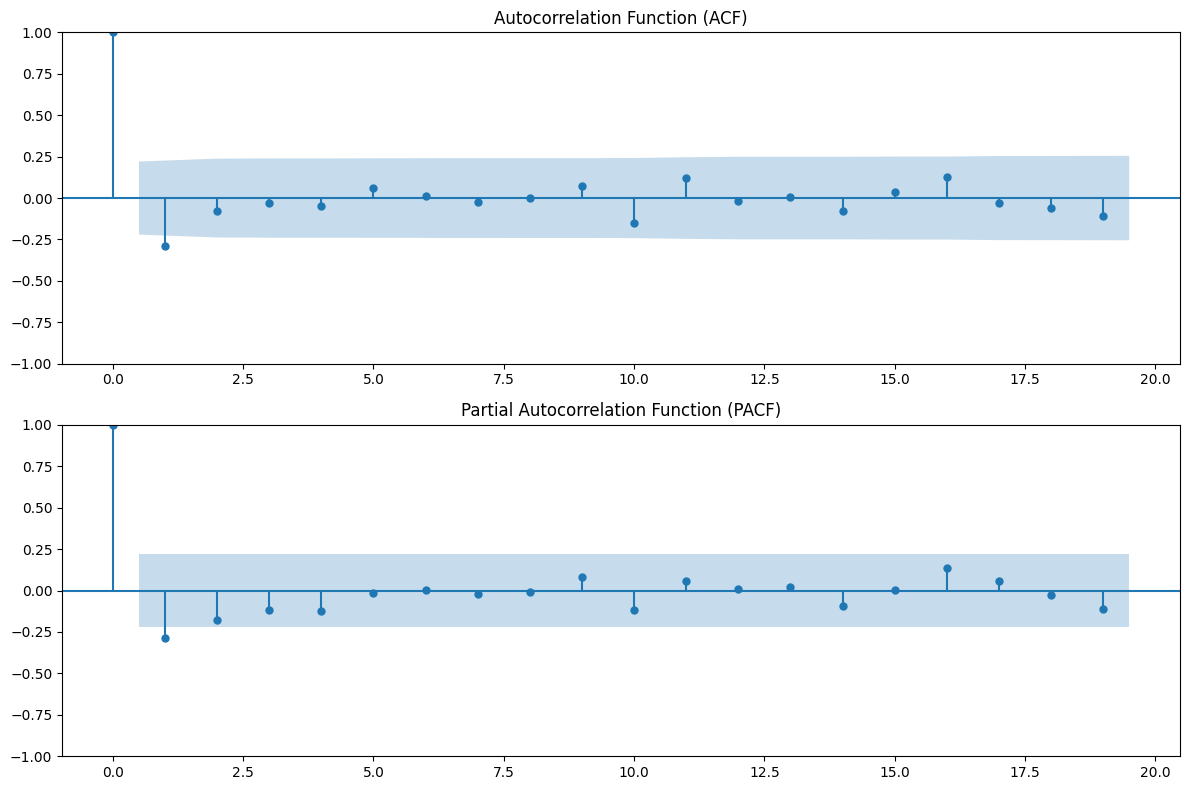

In [32]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Drop NA values after differencing
net_profit_diff = monthly_sales['Net Profit Diff'].dropna()

# Create ACF and PACF plots
fig, axes = plt.subplots(2, 1, figsize=(12, 8))

plot_acf(net_profit_diff, ax=axes[0])  # ACF Plot
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(net_profit_diff, ax=axes[1])  # PACF Plot
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define SARIMA parameters
p, d, q = 1, 1, 1
P, D, Q, s = 1, 1, 1, 12  # Assuming monthly seasonality

# Ensure `Net Profit` is a 1D Series
net_profit_series = monthly_sales['Net Profit']

# Fit the SARIMA model
model = SARIMAX(net_profit_series, order=(p, d, q), seasonal_order=(P, D, Q, s))
results = model.fit()

# Print summary
print(results.summary())


                                     SARIMAX Results                                      
Dep. Variable:                         Net Profit   No. Observations:                   79
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -334.098
Date:                            Mon, 24 Mar 2025   AIC                            674.196
Time:                                    15:49:28   BIC                            680.765
Sample:                                         0   HQIC                           676.792
                                             - 79                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2831      0.114     -2.477      0.013      -0.507      -0.059
ar.S.L12      -0.4837      0.078   

c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\rayya\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


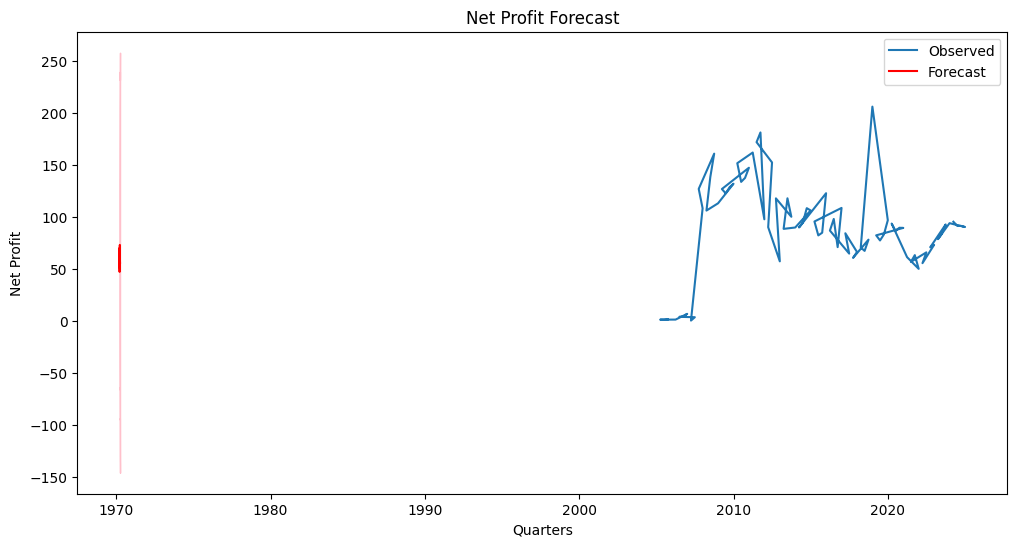

In [34]:
# Forecast future values
forecast_periods = 12  # Forecast the next 12 months
forecast = results.get_forecast(steps=forecast_periods)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales["Net Profit"], label='Observed')
plt.plot(forecast_mean, label='Forecast', color='red')
plt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
plt.title("Net Profit Forecast")
plt.xlabel("Quarters")
plt.ylabel("Net Profit")
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Extract only 'Net Profit' for observed values
observed = monthly_sales['Net Profit'][-forecast_periods:]

# Compute MAE & MSE
mae = mean_absolute_error(observed, forecast_mean)
mse = mean_squared_error(observed, forecast_mean)

print(f'MAE: {mae}')
print(f'MSE: {mse}')


MAE: 22.596038695799674
MSE: 647.1753369034276
